In [14]:
!pip install plotly

In [15]:
import plotly.express as px

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/IA PROJECT 1/train.csv")

In [5]:
# Reemplazar "?" por NaN
df = df.replace("?", np.nan)

# Convertir columnas numéricas a número
cols_num = ['age','sex','cp','trestbps','chol','fbs','restecg',
            'thalach','exang','oldpeak','slope','ca','thal']

for col in cols_num:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Reemplazar -9 por NaN (como en tu ipynb)
df[cols_num] = df[cols_num].replace(-9, np.nan)


In [6]:
df = df.rename(columns={
    "age": "edad",
    "sex": "sexo",
    "cp": "tipo_dolor_pecho",
    "trestbps": "tension_en_descanso",
    "chol": "colesterol",
    "fbs": "azucar",
    "restecg": "electro_en_descanso",
    "thalach": "latidos_por_minuto",
    "exang": "dolor_pecho_con_ejercicio",
    "oldpeak": "cambio_linea_corazon_ejercicio",
    "slope": "forma_linea_corazon_ejercicio",
    "ca": "num_venas_grandes",
    "thal": "estado_corazon_thal"
})


In [7]:
df = df.dropna()

In [8]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 0 to 731
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   edad                            246 non-null    float64
 1   sexo                            246 non-null    float64
 2   tipo_dolor_pecho                246 non-null    float64
 3   tension_en_descanso             246 non-null    float64
 4   colesterol                      246 non-null    float64
 5   azucar                          246 non-null    float64
 6   electro_en_descanso             246 non-null    float64
 7   latidos_por_minuto              246 non-null    float64
 8   dolor_pecho_con_ejercicio       246 non-null    float64
 9   cambio_linea_corazon_ejercicio  246 non-null    float64
 10  forma_linea_corazon_ejercicio   246 non-null    float64
 11  num_venas_grandes               246 non-null    float64
 12  estado_corazon_thal             246 non-n

,edad,sexo,tipo_dolor_pecho,tension_en_descanso,colesterol,azucar,electro_en_descanso,latidos_por_minuto,dolor_pecho_con_ejercicio,cambio_linea_corazon_ejercicio,forma_linea_corazon_ejercicio,num_venas_grandes,estado_corazon_thal,label
0,51.0,1.0,1.0,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0
4,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3
5,44.0,1.0,4.0,120.0,169.0,0.0,0.0,144.0,1.0,2.8,3.0,0.0,6.0,2
6,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
11,64.0,1.0,4.0,120.0,246.0,0.0,2.0,96.0,1.0,2.2,3.0,1.0,3.0,3


---
GRÁFICO 1 — Histograma + línea de densidad (KDE) de COLESTEROL

In [17]:
fig = px.histogram(
    df,
    x="colesterol",
    nbins=30,
    histnorm="probability density",  # similar a densidad
    marginal="box",                  # añade un boxplot arriba
    opacity=0.7,
    title="Distribución del colesterol"
)

fig.update_layout(
    xaxis_title="Colesterol",
    yaxis_title="Densidad aproximada"
)

fig.show()


La distribución del colesterol en el conjunto de datos presenta una forma aproximadamente normal, con un ligero sesgo hacia valores altos. La mayoría de los pacientes se concentra entre 200 y 260 mg/dl, con una mediana alrededor de 240 mg/dl. No obstante, se observan varios outliers por encima de 400 mg/dl, e incluso un caso cercano a 550 mg/dl, lo que indica la presencia de hipercolesterolemia severa en un subconjunto de pacientes. Esta variabilidad en los valores altos confirma un mayor riesgo cardiovascular asociado a estas personas.

---
GRÁFICO 2 — Histograma + KDE de CAMBIO LINEA DEL CORAZÓN

In [18]:
fig = px.histogram(
    df,
    x="cambio_linea_corazon_ejercicio",
    nbins=30,
    histnorm="probability density",
    marginal="box",
    opacity=0.7,
    title="Distribución del cambio en la línea del corazón (ejercicio)"
)

fig.update_layout(
    xaxis_title="Cambio línea corazón (oldpeak)",
    yaxis_title="Densidad aproximada"
)

fig.show()


La variable "cambio linea corazon" presenta una distribución claramente sesgada hacia la derecha, con la mayor parte de los pacientes concentrados entre 0 y 1. Esto indica que la mayoría no muestra una depresión significativa del segmento ST durante el ejercicio. Sin embargo, se observan valores aislados por encima de 3 y hasta 6, considerados clínicamente relevantes, ya que suelen asociarse a **isquemia** (al corazón no le llega suficiente sangre y oxígeno) o **disfunción coronaria** (cualquier problema en el funcionamiento de las arterias coronarias). El boxplot confirma una mediana baja y la presencia de varios outliers, lo que nos confirma que solo un subconjunto reducido de pacientes presenta alteraciones cardíacas importantes durante el esfuerzo.

---
GRÁFICO 3 — Relación entre Colesterol y CAMBIO LINEA CORAZÓN



In [24]:
fig = px.scatter(
    df,
    x="colesterol",
    y="cambio_linea_corazon_ejercicio",
    color="label",
    hover_data=["edad", "latidos_por_minuto", "tipo_dolor_pecho"],
    title="Relación entre colesterol y cambio línea corazón (por label)"
)

fig.update_layout(
    xaxis_title="Colesterol",
    yaxis_title="Cambio línea corazón (oldpeak)"
)

fig.show()


Al analizar conjuntamente el colesterol y el cambio en la línea del corazón durante el ejercicio no se observa una correlación directa entre ambas variables. Los pacientes presentan niveles altos de oldpeak tanto con colesterol moderado como elevado. Sin embargo, al incorporar el nivel de riesgo (label), se identifica que los valores más altos de oldpeak tienden a concentrarse en los grupos con mayor riesgo, lo que indica que oldpeak es un indicador más relevante para caracterizar la gravedad cardiaca que el colesterol en este conjunto de datos.

---
GRÁFICO 4- Boxplot de COLESTEROL por LABEL

In [20]:
fig = px.box(
    df,
    x="label",
    y="colesterol",
    points="all",  # muestra también los puntos individuales
    title="Colesterol según nivel de riesgo (label)"
)

fig.update_layout(
    xaxis_title="Label (nivel de riesgo)",
    yaxis_title="Colesterol"
)

fig.show()


Al analizar el colesterol según el nivel de riesgo (label) no se observa una tendencia clara ni diferencias significativas entre grupos. Las medianas y los rangos son muy similares, lo que indica que el colesterol, por sí solo, no permite distinguir entre niveles de riesgo en este conjunto de datos. Aunque existen valores extremos elevados, estos se distribuyen en distintos labels, por lo que la hipercolesterolemia severa no se asocia exclusivamente a los grupos de mayor riesgo. En consecuencia, el colesterol no se presenta como una variable especialmente discriminante para el diagnóstico final.

---
GRÁFICO 5 — Boxplot de CAMBIO LINEA CORAZÓN por LABEL

In [21]:
fig = px.box(
    df,
    x="label",
    y="cambio_linea_corazon_ejercicio",
    points="all",
    title="Cambio línea corazón según nivel de riesgo (label)"
)

fig.update_layout(
    xaxis_title="Label (nivel de riesgo)",
    yaxis_title="Cambio línea corazón (oldpeak)"
)

fig.show()


Al analizar el cambio en la línea del corazón (oldpeak) según el nivel de riesgo, se observa una relación claramente ascendente: los pacientes con mayor riesgo presentan valores significativamente más altos de oldpeak. La mediana crece progresivamente de label 0 a label 4, y los valores máximos (outliers por encima de 4 o 5) aparecen únicamente en los grupos de mayor riesgo. Esto indica que la depresión del segmento ST durante el ejercicio está estrechamente asociada con la gravedad de la afectación cardíaca, siendo una de las variables más discriminantes del conjunto de datos.

---
GRÁFICO 6 — Tipo de dolor de pecho por Label (categorías × categoría)

In [22]:
fig = px.histogram(
    df,
    x="tipo_dolor_pecho",
    color="label",
    barmode="group",   # o "stack" si quieres apiladas
    title="Tipo de dolor de pecho por nivel de riesgo (label)"
)

fig.update_layout(
    xaxis_title="Tipo de dolor de pecho",
    yaxis_title="Número de pacientes"
)

fig.show()


El análisis del tipo de dolor de pecho revela una clara asociación entre el tipo de dolor reportado y el nivel de riesgo cardíaco (label). Los tipos de dolor 1 y 2 aparecen mayoritariamente en pacientes con riesgo nulo (label 0), lo que sugiere que estos síntomas suelen ser benignos. En contraste, el tipo de dolor 4 muestra una distribución mucho más equilibrada entre los distintos niveles de riesgo, incluyendo presencia en los niveles 2, 3 y 4, lo que indica una posible relación con síntomas anginosos o típicos de enfermedad coronaria. De forma general, los pacientes con dolor de pecho tipo 4 presentan mayor probabilidad de estar asociados a riesgo cardíaco real.

---
GRÁFICO 7 — Dolor pecho con ejercicio por Label

In [23]:
fig = px.histogram(
    df,
    x="dolor_pecho_con_ejercicio",
    color="label",
    barmode="group",
    title="Dolor de pecho con ejercicio por nivel de riesgo (label)"
)

fig.update_layout(
    xaxis_title="Dolor de pecho con ejercicio",
    yaxis_title="Número de pacientes"
)

fig.show()


La variable “dolor de pecho con ejercicio” muestra una relación significativa con el nivel de riesgo cardíaco. Cuando el paciente no experimenta dolor durante el ejercicio (valor 0), predominan los casos clasificados como riesgo nulo (label 0). Sin embargo, cuando aparece dolor durante el esfuerzo (valor 1), la distribución se desplaza hacia niveles de riesgo superiores, con un aumento notable de pacientes en los labels 1, 2 y 3, e incluso algunos casos en el label 4. Estos resultados sugieren que el dolor inducido por ejercicio es un síntoma fuertemente asociado a la presencia y gravedad de la enfermedad coronaria.

In [26]:
fig = px.scatter(
    df,
    x="cambio_linea_corazon_ejercicio",
    y="latidos_por_minuto",
    color="label",
    hover_data=["edad", "colesterol", "tipo_dolor_pecho"],
    title="Relación entre cambio línea corazón (oldpeak) y latidos por minuto",
)

fig.update_layout(
    xaxis_title="Cambio línea corazón (oldpeak)",
    yaxis_title="Latidos por minuto (thalach)"
)

fig.show()


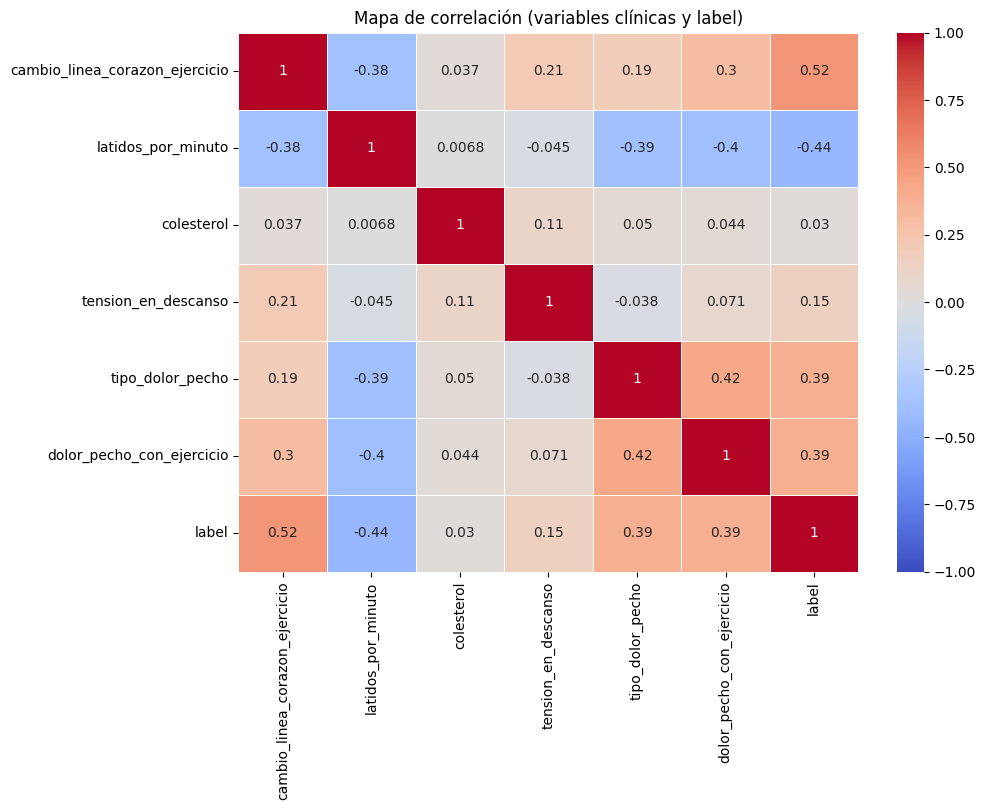

In [31]:
cols_clinicas = [
    "cambio_linea_corazon_ejercicio",
    "latidos_por_minuto",
    "colesterol",
    "tension_en_descanso",
    "tipo_dolor_pecho",
    "dolor_pecho_con_ejercicio",
    "label"
]

corr_clinica = df[cols_clinicas].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(
    corr_clinica,
    annot=True,
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.5
)
plt.title("Mapa de correlación (variables clínicas y label)")
plt.show()

---
CONCLUSIONES DE LOS GRÁFICOS


1. El colesterol NO parece un buen predictor del riesgo (label)
- Su distribución es bastante normal y homogénea.
- Los valores de colesterol son muy parecidos entre los distintos niveles de riesgo.
- No hay una relación clara entre colesterol y oldpeak.

El colesterol por sí solo NO discrimina bien entre pacientes sanos y pacientes de riesgo.

2. El cambio en la línea del corazón (oldpeak) SÍ es un predictor muy fuerte.
- Pacientes con riesgo alto muestran oldpeak claramente mayor.
- Las medianas aumentan progresivamente desde label 0 hasta label 4.

Los valores más altos de oldpeak solo aparecen en los niveles más graves.

3. La isquemia inducida por ejercicio (oldpeak) es el indicador más importante de enfermedad cardiaca.
- Oldpeak aumenta de forma clara según sube el riesgo (label).
- Los valores extremos solo aparecen en pacientes de riesgo moderado-alto.
- No depende del colesterol ni de la frecuencia cardíaca: es un signo directo de isquemia.

3. El tipo de dolor de pecho distingue muy bien entre pacientes con y sin riesgo.
- Los tipos de dolor 1 y 2 aparecen casi solo en pacientes sanos (label 0).
- El tipo 4 aparece más repartido entre labels 1, 2 y 3.
- No todos los tipos de dolor son iguales: unos son muy benignos, otros están asociados a enfermedad.

El tipo de dolor de pecho aporta información clínica muy útil para clasificar riesgo.

4. Los síntomas importan más que algunos biomarcadores.
- Tipo de dolor de pecho → fuerte diferenciador: Los dolores típicos/anginosos se concentran en labels más altos.
- Los dolores atípicos o no anginosos aparecen casi solo en label 0.
- Dolor con ejercicio → literalmente indica “angina de esfuerzo”.
Cuando aparece, el riesgo sube muchísimo.

La presencia y el tipo de dolor torácico son variables críticas para el diagnóstico. Los síntomas subjetivos aportan más información clínica que el colesterol en sí.

5. El colesterol es un factor de riesgo, pero NO un buen discriminador de enfermedad en este dataset.

- La distribución de colesterol es parecida en todos los niveles de riesgo.
- No cambia la mediana entre labels.
- No correlaciona con oldpeak.
- Hay pacientes con colesterol muy alto pero riesgo 0.

El colesterol aumenta el riesgo a largo plazo, pero no predice bien si un paciente ya tiene enfermedad coronaria significativa. No sirve para clasificar el riesgo “agudo” en el dataset.

6. Los pacientes de mayor riesgo cardiaco tienen menor capacidad de alcanzar pulsaciones elevadas.
- Riesgo bajo → latidos altos, oldpeak bajo
- Riesgo alto → oldpeak alto, latidos más bajos

Un corazón enfermo no eleva la frecuencia cardíaca de forma eficiente durante el esfuerzo, y además muestra isquemia (oldpeak).